## Project - Predicting Heart Disease

In this project we want to build a machine learning model that will accurately predict the likelihood of a new patient having heart disease in the future, given that The World Health Organization (WHO) estimates that 17.9 million people die from cardiovascular diseases (CVDs) every year.

There are multiple risk factors that could contribute to CVD in an individual, such as unhealthy diet, lack of physical activity, or mental illness. Identifying these risk factors early on could help prevent many premature deaths.

We are using anonymized data from multiple hospitals on several patients. The dataset includes relevant information for each patient, such as their personal information and some medical data, including whether or not they have had heart disease before.
The dataset has the following features:

* `Age`: age of the patient [years]
*`Sex`: sex of the patient [M: Male, F: Female]
* `ChestPainType`: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
* `RestingBP`: resting blood pressure [mm Hg]
* `Cholesterol`: serum cholesterol [mm/dl]
* `FastingBS`: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
* `RestingECG`: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
* `MaxHR`: maximum heart rate achieved [Numeric value between 60 and 202]
* `ExerciseAngina`: exercise-induced angina [Y: Yes, N: No]
* `Oldpeak`: oldpeak = ST [Numeric value measured in depression]
* `ST_Slope`: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
* `HeartDisease`: output class [1: heart disease, 0: Normal]

![Image](https://images.unsplash.com/photo-1618939304347-e91b1f33d2ab?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=987&q=80)
_Photo by Kenny Eliason on Unsplash_

### Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


In [2]:
file=pd.read_csv("C:/Users/Denisa/Desktop/Project Apps/project 17/heart_disease_prediction.csv")

In [3]:
file.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
file.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

We need to note that a couple of columns -- FastingBS and HeartDisease -- have the dtype int64, but are also categorical variables, since they only take the values 0 and 1.

In [5]:
print('Number of features:', file.shape[1])
print('Number of observations:' ,file.shape[0])

Number of features: 12
Number of observations: 918


### Descriptive Statistics

In [6]:
file.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

There seems to be no missing values in the columns in the dataset.

In [7]:
file.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Based on the descriptive statistics, here are some of the observations that we can make:

* The average age of patients is ~53 years.
* The median for Cholesterol is higher than its mean by roughly 25 mm/dl, indicating that it could be a left-skewed distribution with a possibility of outliers skewing the distribution.
* RestingBP and Cholesterol have a minimum value of zero. RestingBP is the resting blood pressure, and it's unlikely to be zero. Same thing applies for Cholesterol.

### EDA: Visualizations

We'll explore the categorical features next, but we'll rely on creating visualizations to understand how the data is distributed.For every categorical column in the dataset we will create a bar chart that displays the number of rows for each category of that column.

In [8]:
file.describe(include=['object'])

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


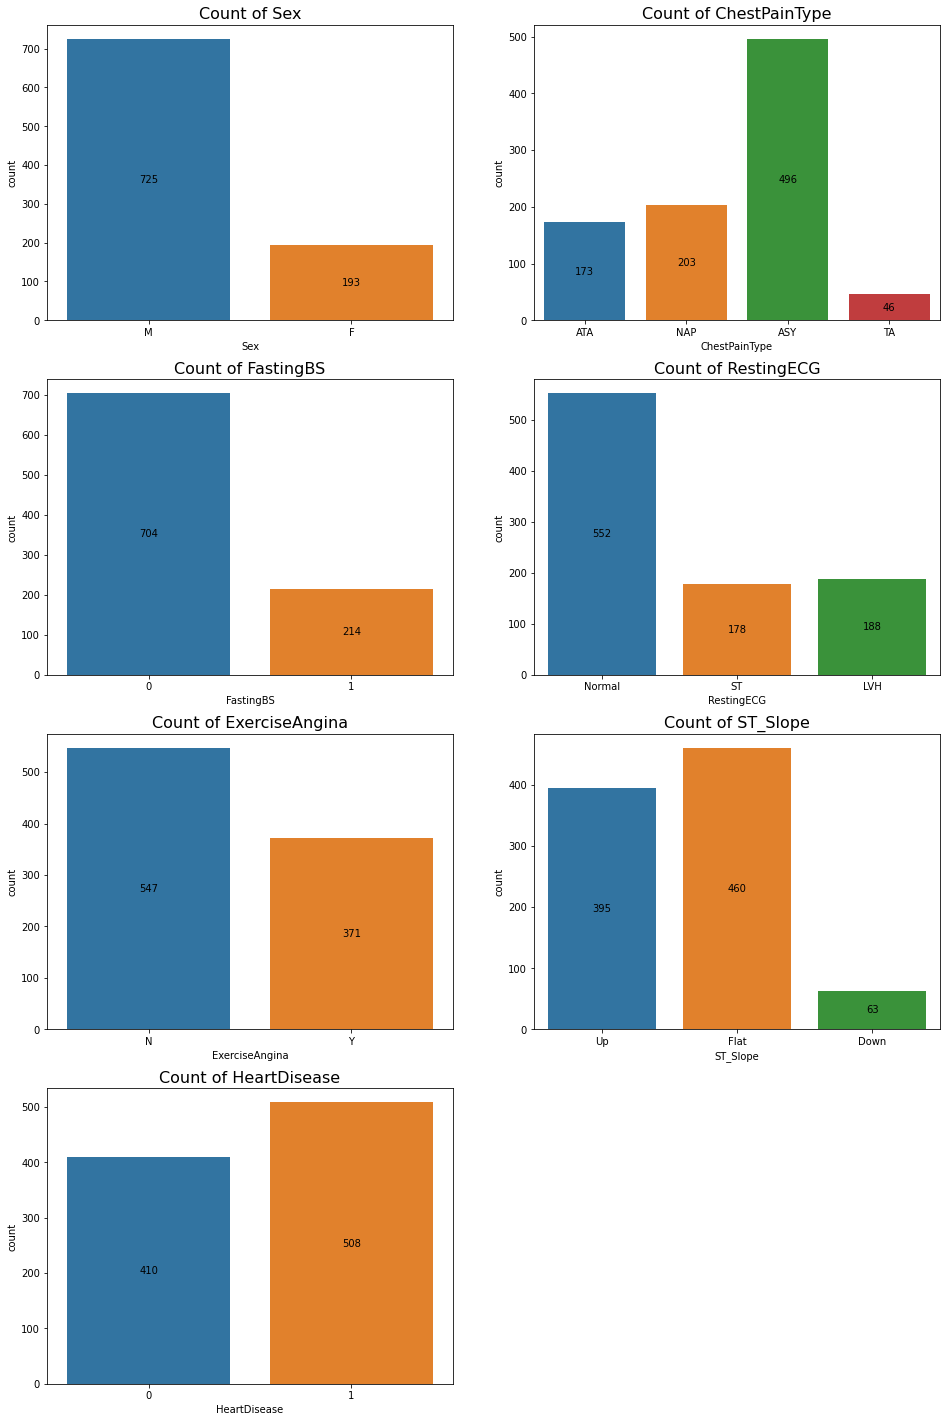

In [9]:

categorical_cols = ["Sex", "ChestPainType", "FastingBS", "RestingECG", "ExerciseAngina", "ST_Slope", "HeartDisease"]

fig = plt.figure(figsize=(16,25))

for idx, col in enumerate(categorical_cols):
    ax = plt.subplot(4, 2, idx+1)
    sns.countplot(x=file[col], ax=ax)
    # add data labels to each bar
    ax.set_title(f'Count of {col}', size=16)
    for container in ax.containers:
        ax.bar_label(container, label_type="center")
    

The dataset is highly skewed towards male patients. There are 725 male patients and 193 female patients. This could potentially induce a bias in our model.
* 496 patients had ASY (asymptotic) chest pain type.
* 552 patients had a normal restin ECG.
* 704 patients had blood sugar lower than 120 mg/dl

Next, for every categorical column in the dataset, we will create a bar chart that displays the number of rows for each category of that column, grouped by `HeartDisease`. This will give us a better idea about the data distribution.

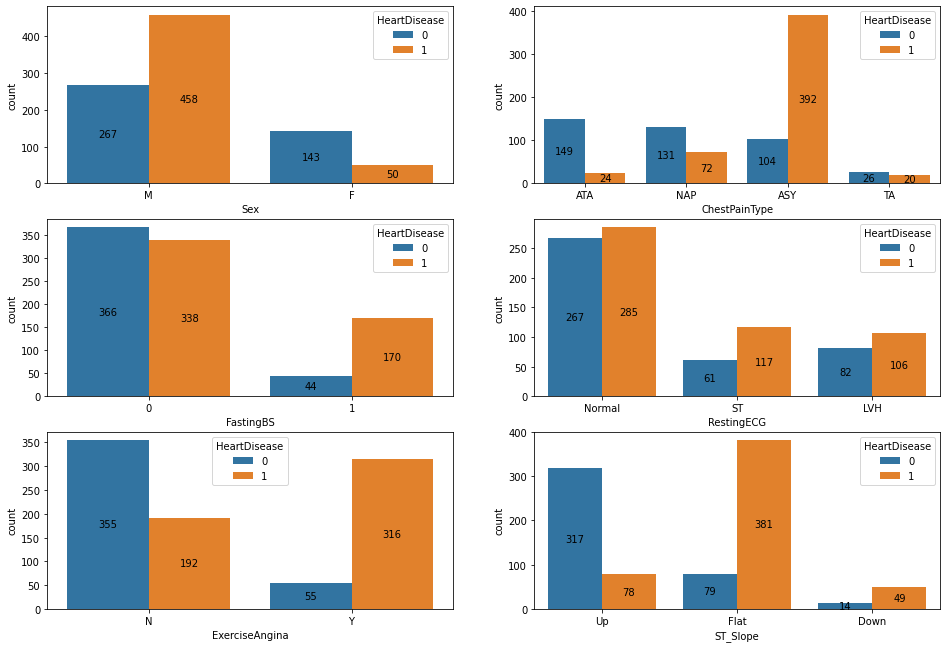

In [10]:
fig = plt.figure(figsize=(16,15))

for idx, col in enumerate(categorical_cols[:-1]):
    ax = plt.subplot(4, 2, idx+1)
    # group by HeartDisease
    sns.countplot(x=file[col], hue=file["HeartDisease"], ax=ax)
    # add data labels to each bar
    for container in ax.containers:
        ax.bar_label(container, label_type="center")
        


* We can further notice how skewed the dataset is towards male patients. Only 50 female patients in the dataset have been diagnosed with heart disease.
* A significant number of patients, 392, diagnosed with heart disease have asymptomatic (ASY) chest pain. While chest pain could be a relevant feature for our model, asymptomatic implies that those patients who had a heart disease did not have chest pain as a symptom.
* A high number (170) of patients with blood sugar greater than 120 mg/dl were diagnosed with heart disease in relation to those who were not diagnosed as such.
* Out of all patients who had an exercise-induced angina, 316 were diagnosed with a heart disease.
* Out of all patients with a flat ST slope, 381 were diagnosed with a heart disease

What percentage of patients with heart disease are male and over 50 years old?

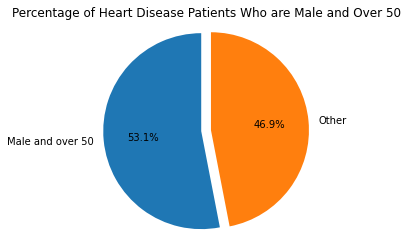

In [11]:
heart_disease_df = file[file['HeartDisease'] == 1]

male_over_50 = ((file['Sex'] == 'M') & (file['Age'] > 50)).sum()
total_heart_disease = len(file)
percent_male_over_50 = male_over_50 / total_heart_disease * 100


labels = ['Male and over 50', 'Other']
sizes = [percent_male_over_50, 100 - percent_male_over_50]
explode = (0.1, 0)

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  
ax.set_title('Percentage of Heart Disease Patients Who are Male and Over 50')
plt.show()

What is the median age of patients who were diagnosed with heart disease?

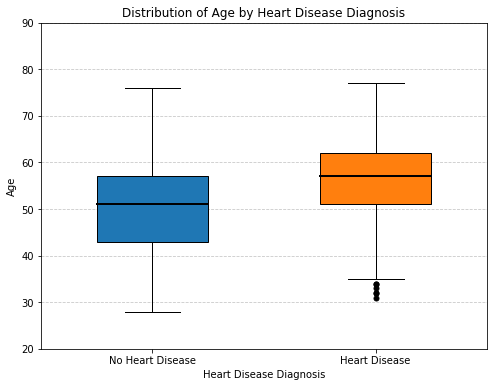

In [12]:

plt.figure(figsize=(8, 6))


bp = plt.boxplot(x=[file[file['HeartDisease'] == 0]['Age'], file[file['HeartDisease'] == 1]['Age']],
                 labels=['No Heart Disease', 'Heart Disease'], patch_artist=True, widths=0.5, showfliers=True,
                 flierprops={'marker':'o', 'markerfacecolor':'black', 'markersize':5})


colors = ['#1f77b4', '#ff7f0e']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)


for median in bp['medians']:
    median.set(color='black', linewidth=2)


plt.xlabel('Heart Disease Diagnosis')
plt.ylabel('Age')
plt.title('Distribution of Age by Heart Disease Diagnosis')


plt.ylim(20, 90)


plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

### Data Cleaning

Handling the `RestingBP` and `Cholesterol` columns. We will replace those values with the median value of the corresponding column and the corresponding HeartDisease value.

In [13]:
print(f"Number of rows that have 0 values for RestingBP: {(file['RestingBP'] == 0).sum()}")
print(f"Number of rows that have 0 values for Cholesterol: {(file['Cholesterol'] == 0).sum()}")

Number of rows that have 0 values for RestingBP: 1
Number of rows that have 0 values for Cholesterol: 172


`RestingBP` has only one zero value. We can remove that row from consideration. There are 172 zero values for `Cholesterol`. That's a relatively high number. We can't remove them all, so we choose to replace those values with the median value of the corresponding column and the corresponding HeartDisease value.

In [14]:

heart_clean_df = file.copy()


heart_clean_df=heart_clean_df[heart_clean_df['RestingBP']!=0]


heart_clean_df['Cholesterol'] = heart_clean_df.groupby('HeartDisease')['Cholesterol'].apply(lambda x: x.replace(0, x.median()))

In [15]:
heart_clean_df[["Cholesterol", "RestingBP"]].describe()

,Cholesterol,RestingBP
count,917.000000,917.000000
mean,239.700109,132.540894
std,54.352727,17.999749
min,85.000000,80.000000
25%,214.000000,120.000000
50%,225.000000,130.000000
75%,267.000000,140.000000
max,603.000000,200.000000


### Feature Selection

Now that we've cleaned our data, we can select features for our model. Thanks to our EDA and a general understanding of the features, we can identify some of the features that we could start with:

* Age
* Sex
* ChestPainType
* Cholesterol
* FastingBS
We will also identify how stronly the feature columns are correlated to the target colummn. That should help us narrow down on the features.

In order to do that, we will first convert our categorical columns into dummy variables.

In [16]:
heart_clean_df = pd.get_dummies(heart_clean_df, drop_first=True)
heart_clean_df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1


### Pearson correlation heat map

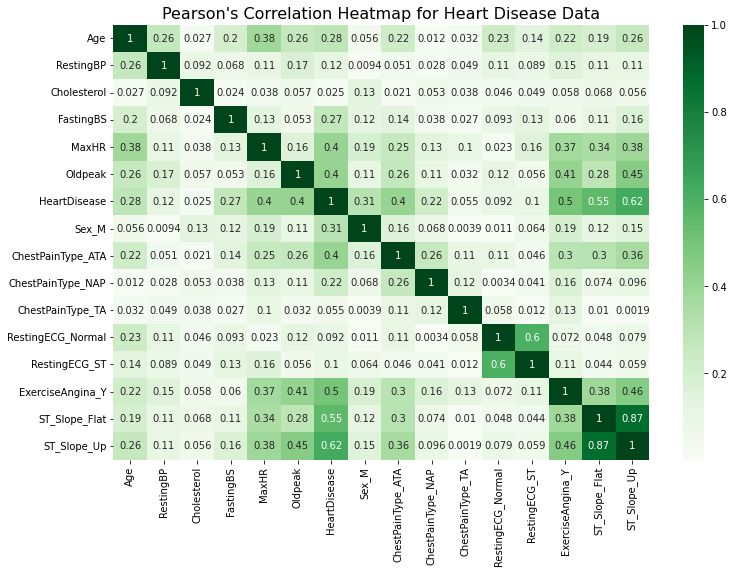

In [17]:
corr_mat = abs(heart_clean_df.corr())
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(corr_mat, annot=True, cmap='Greens')
plt.title("Pearson's Correlation Heatmap for Heart Disease Data", fontsize=16)
plt.show()

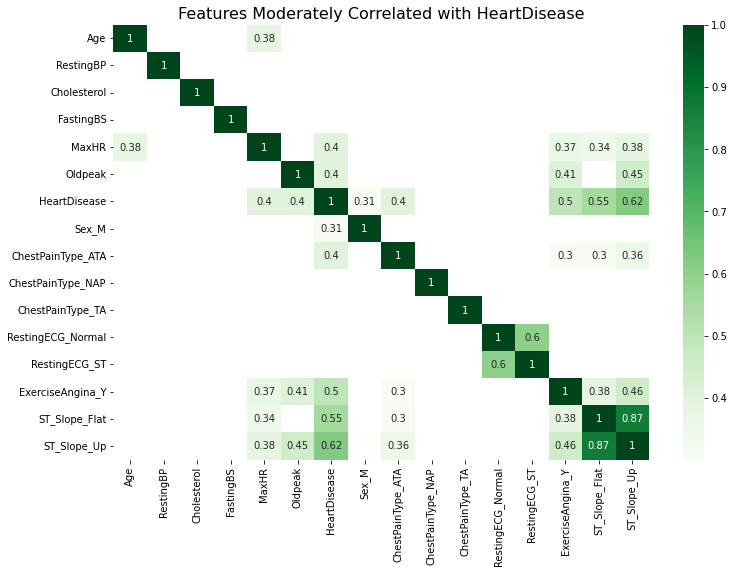

In [18]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_mat[corr_mat > 0.3], annot=True, cmap='Greens')
plt.title('Features Moderately Correlated with HeartDisease', size=16)
plt.show()

### Square of the Pearson correlation coefficient

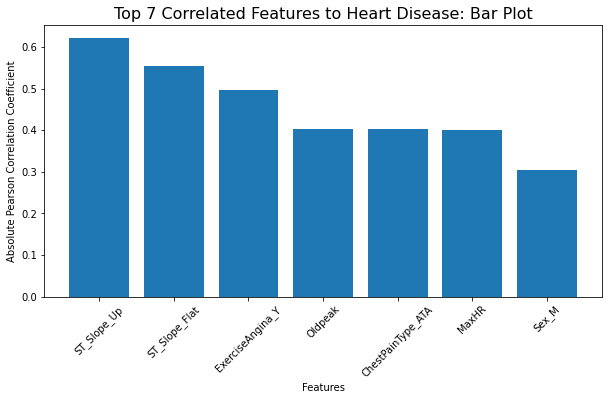

In [19]:
top_7_features = (corr_mat['HeartDisease'] ** 2).sort_values(ascending=False)[1:8].index.tolist()
plt.figure(figsize=(10, 5))
plt.bar(x=top_7_features, height=corr_mat.loc[top_7_features, 'HeartDisease'])
plt.xticks(rotation=45)
plt.title('Top 7 Correlated Features to Heart Disease: Bar Plot', fontsize=16)
plt.ylabel('Absolute Pearson Correlation Coefficient')
plt.xlabel('Features')
plt.show()

### Building a Classifier With One Feature

From our correlation heat map, we can identify the following features to be positively correlated (correlation coefficient greater than 0.3) to `HeartDisease`:

* Oldpeak - We could also select MaxHR or ChestPainType_ATA.
* Sex_M - It has a relatively low value for the coefficient, but given what we observed in our EDA, let's also take it into account.
* ExerciseAngina_Y
* ST_Slope_Flat
* ST_Slope_Up

Next, we will create and train multiple models using one of these features at a time.

In [20]:
X = heart_clean_df.drop(["HeartDisease"], axis=1)
y = heart_clean_df["HeartDisease"]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, random_state = 417)
features = [
    "Oldpeak",
    "Sex_M",
    "ExerciseAngina_Y",
    "ST_Slope_Flat",
    "ST_Slope_Up"
]

for feature in features:
    knn = KNeighborsClassifier(n_neighbors = 3)
    knn.fit(X_train[[feature]], y_train)
    accuracy = knn.score(X_val[[feature]], y_val)
    print(f"The k-NN classifier trained on {feature} and with k = 3 has an accuracy of {accuracy*100:.2f}%")


The k-NN classifier trained on Oldpeak and with k = 3 has an accuracy of 58.70%
The k-NN classifier trained on Sex_M and with k = 3 has an accuracy of 61.59%
The k-NN classifier trained on ExerciseAngina_Y and with k = 3 has an accuracy of 73.19%
The k-NN classifier trained on ST_Slope_Flat and with k = 3 has an accuracy of 81.88%
The k-NN classifier trained on ST_Slope_Up and with k = 3 has an accuracy of 55.07%


Our best forming model, with an accuracy of ~82.61%, was trained on the ST_Slope_Up feature with ST_Slope_Fat being a close second. These make sense given the data distributions we saw previously.

### Building a Classifier with Multiple Features

Before training on all of the above features, we need to normalize the data first. We will use scikit-learn's MinMaxScaler to scale the values between 0 and 1, and then train the model again. 

In [21]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train[features])
X_val_scaled = scaler.transform(X_val[features])

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train_scaled, y_train)
accuracy = knn.score(X_val_scaled, y_val)
print(f"Accuracy: {accuracy*100:.2f}")

Accuracy: 83.33


Using all these features results in an improved model with an accuracy of ~83.3%.

### Hyperparameter Optimization

Now that we have a reasonably well-performing model, we can experiment with the parameters and hyperparameters. We'll use GridSearchCV to search over those values.
GridSearchCV, as we know, allows us to search over all the parameters for our classifier in scikit-learn. For example, for the KNeighborsClassifier we can choose to experiment with the following:

* n_neighbors,
* weights,
* metric and more.

In [22]:
# Define the parameter grid for GridSearchCV
grid_params = {'n_neighbors': list(range(1,21)),
          'weights': ['uniform', 'distance'],
          'metric': ['minkowski', 'manhattan'],
        }

X = heart_clean_df.drop(["HeartDisease"], axis=1)
y = heart_clean_df["HeartDisease"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state = 417)

features = [
    "Oldpeak",
    "Sex_M",
    "ExerciseAngina_Y",
    "ST_Slope_Flat",
    "ST_Slope_Up"
]

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train[features])
knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn, grid_params, scoring='accuracy')
knn_grid.fit(X_train_scaled, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [23]:
knn_grid.best_score_*100, knn_grid.best_params_

(83.6914805624483,
 {'metric': 'minkowski', 'n_neighbors': 20, 'weights': 'uniform'})

Our best model had an accuracy of ~83.69% with 20 n_neighbors, uniform weights and minkowski as the distance metric.

### Model Evaluation on Test Set

In [24]:
X_test_scaled = scaler.transform(X_test[features])
predictions = knn_grid.best_estimator_.predict(X_test_scaled)
accuracy = accuracy_score(y_test, predictions)
print(f" Model Accuracy on test set: {accuracy*100:.2f}")

 Model Accuracy on test set: 87.68


Our model got an accuracy of ~87.68%. This means that our model is likely to correctly predict whether a patient is at risk for a heart disease ~87.68% of the time.

### Conclusion

Our final model was trained using the following features:

* Oldpeak
* Sex_M
* ExerciseAngina_Y
* ST_Slope_Flat
* ST_Slope_Up

and had a test set accuracy of 87.68%. 

It is important to note that the dataset we are using has a significantly higher number of male patients than female ones and this could present a bias because of this imbalance in our dataset and we can see it potentially impacts our model. There are a few things we could try in the future to get better results:

* Try out different features.
* Expand the grid search parameters to identify more optimal hyperparameters.
* Explore other algorithms that might perform better than k-NN.
* Try and collect more data.